# Spherical waves

After we have had a look at plane waves, we can explore a second solution of the homogeneous wave equation - **Spherical Waves**.

In [367]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
import matplotlib as mpl
import matplotlib.cm as cm


from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


## Equations

A spherical wave is as well described by two exponentials containing the spatial and temporal dependence of the wave. The only difference is, that the wavefronts shall describe spheres instead of planes. We therefore need $|\vec{k}||\vec{r}|=k r=const$. The product of the magntitudes of the wavevector and the distance from the source are constant. If we further generalize the position of the source to $\vec{r}_{0}$ we can write a spherical wave by 

\begin{equation}
E=\frac{E_{0}}{|\vec{r}-\vec{r}_{0}|}e^{i k|\vec{r}-\vec{r}_{0}|} e^{-i\omega t}
\end{equation}

Note that we have to introduce an additional scaling of the amplitude with the inverse distance of the source. This is due to energy conservation, as we require that all the energy that flows through all spheres around the source is constant.

In [403]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d-omega*t))/d)

#### Plot the amplitude of the field as a functon of distance

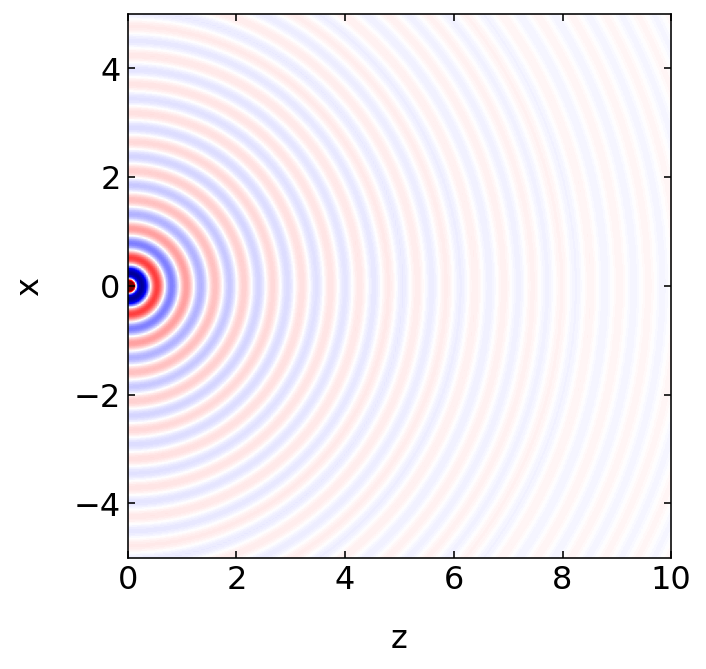

In [442]:
plt.figure(figsize=(5,5))

x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(0,10e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

k=k0*np.array([0,0,1.])
r0=np.array([0,0,0])

field=spherical_wave(k,omega0,r,r0,0)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
bbb=plt.imshow(np.real(field.transpose()),extent=extent,vmin=-5e6,vmax=5e6,cmap='seismic')

plt.xlabel('z')
plt.ylabel('x')
plt.show()

Text(0, 0.5, 'intensity [a.u.]')

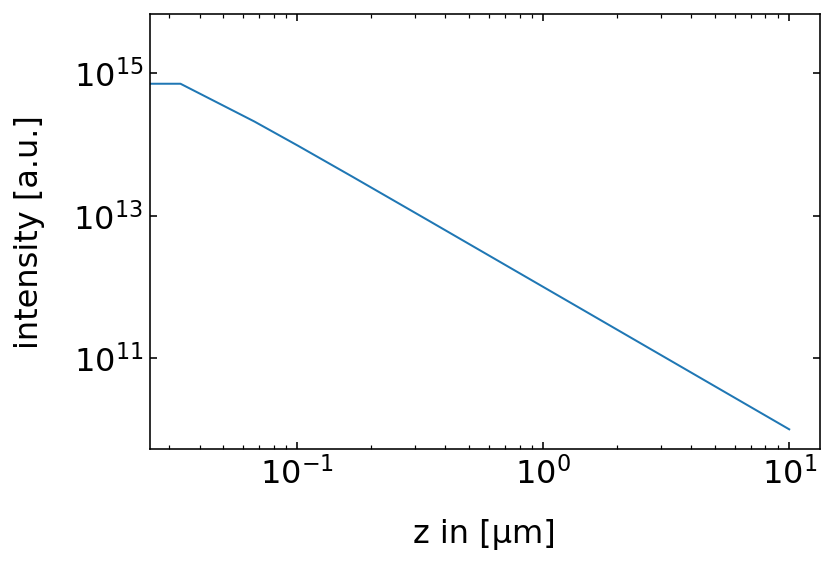

In [443]:
plt.loglog(z*1e6,np.abs(field.transpose()[150,:])**2)
plt.xlabel('z in [µm]')
plt.ylabel('intensity [a.u.]')

In [444]:
norm = mpl.colors.Normalize(vmin=-5e6, vmax=5e6)
cmap = cm.seismic
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [445]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

In [446]:
def animate(k,time):
    for t in time:
        field=spherical_wave(k,omega0,r,r0,t)
        data=np.zeros([300,300,3])
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
        sleep(0.02)

In [447]:
time= np.linspace(0,1e-14,200)
animate(k,time)

#### Plot the intensity in a plane z


We can alo plot the intensity of a spherical wave at a certain distance from the source in the xy-plane.

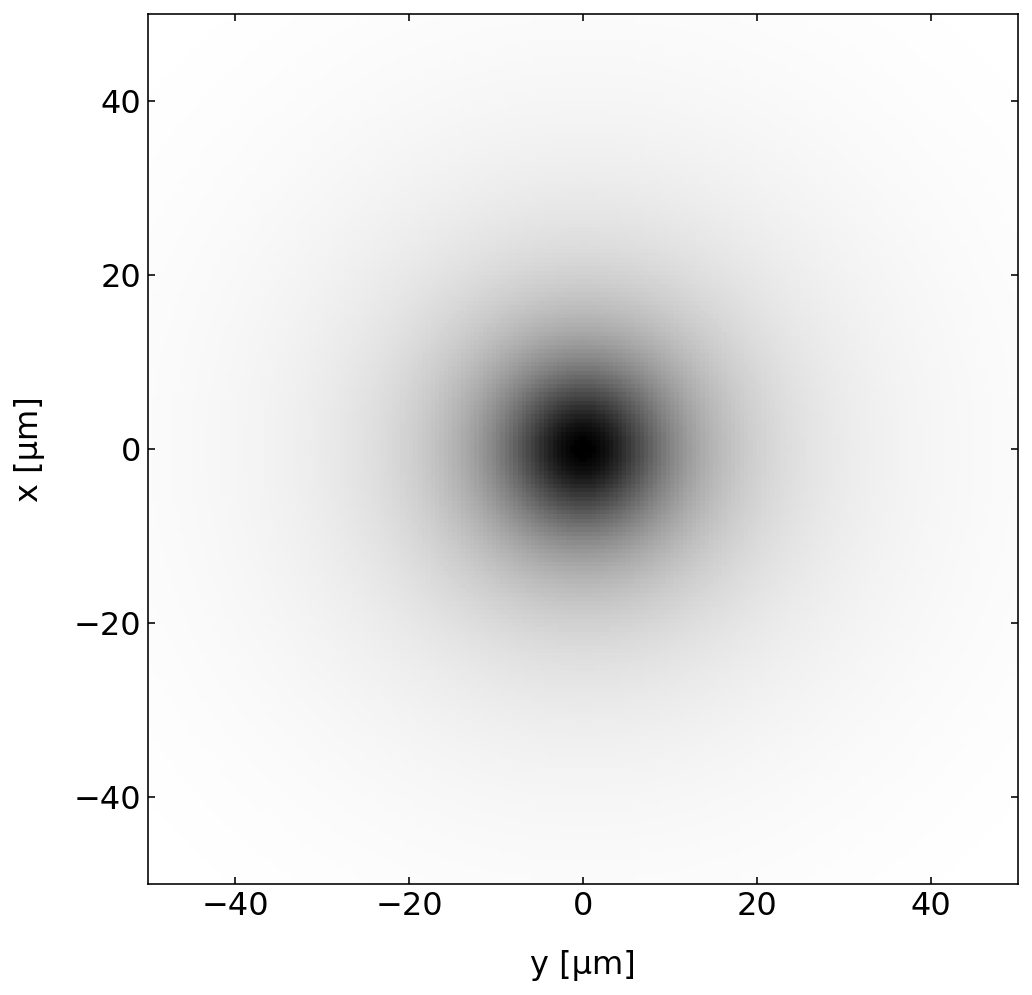

In [448]:
plt.figure(figsize=(8,8))
x=np.linspace(-50e-6,50e-6,200)
y=np.linspace(-50e-6,50e-6,200)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,10e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-20e-9])
field=spherical_wave(k1,omega0,r,r0,0)

plt.imshow(np.abs(field)**2,extent=[-50,50,-50,50],cmap='gray_r')

plt.xlabel('y [µm]')
plt.ylabel('x [µm]')
plt.show()

#### Interference between a spherical and a plane wave

In [389]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

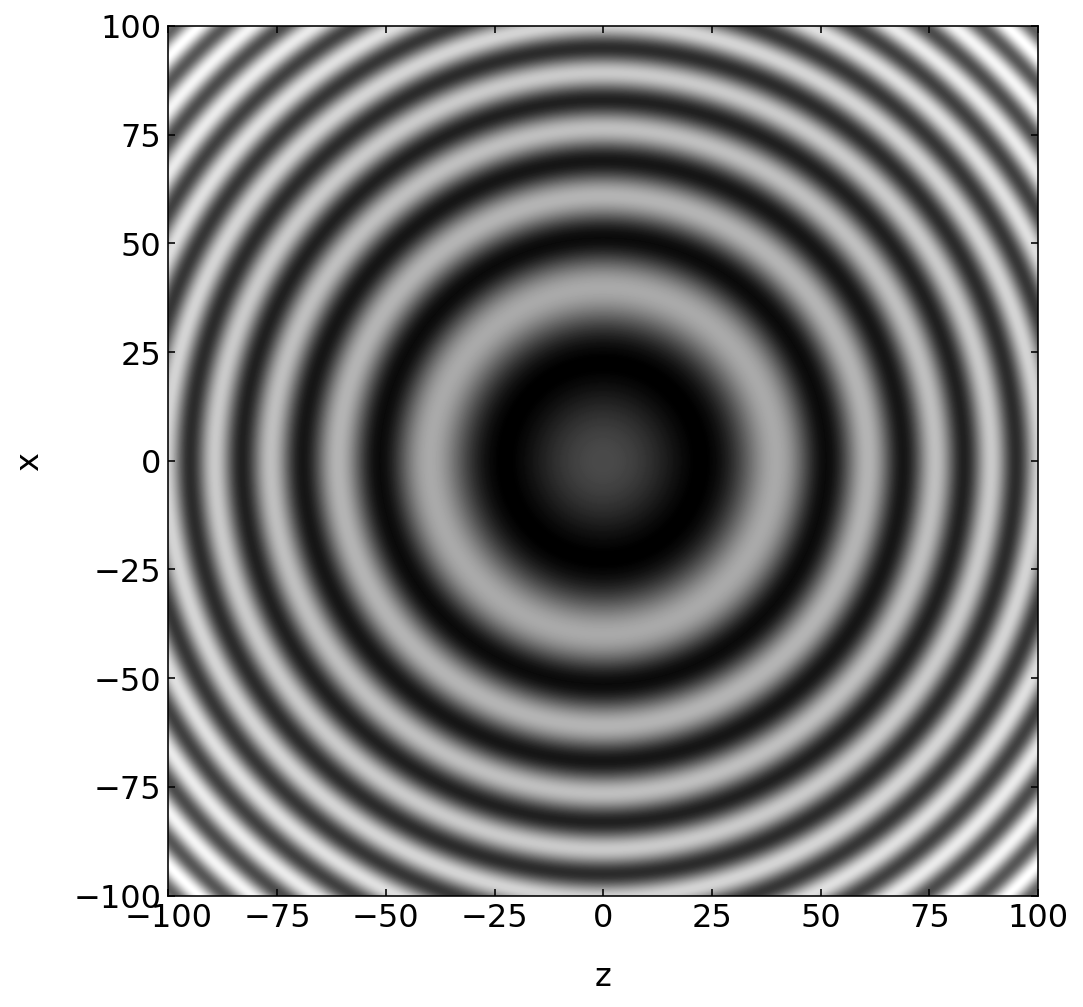

In [449]:
plt.figure(figsize=(8,8))
x=np.linspace(-100e-6,100e-6,1000)
y=np.linspace(-100e-6,100e-6,1000)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,2000e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-2e-6])

field=plane_wave(k1,omega0,r,0)+spherical_wave(k1,omega0,r,r0,0)
extent = np.min(y)*1e6, np.max(y)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.abs(field.transpose())**2,extent=extent,cmap='gray_r')

plt.xlabel('z')
plt.ylabel('x')
plt.show()
